In [7]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import *
plt.style.use('helvet2')

In [13]:
qua1 = pickle.load(open('./Profiles/I_30554.pickle','rb'))
qua2 = pickle.load(open('./Profiles/II_30554.pickle','rb'))
qua3 = pickle.load(open('./Profiles/III_30554.pickle','rb'))

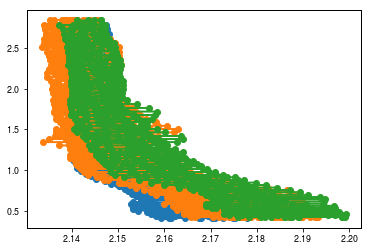

In [19]:
plt.plot(qua1['r'],qua1['n'],marker='o')
plt.plot(qua2['r'],qua2['n'],marker='o')
plt.plot(qua3['r'],qua3['n'],marker='o')
plt.show()

In [38]:
def perf_func(x, a, b, c):
    return a*np.exp(-b*x)+c

In [53]:
from scipy.signal import medfilt

In [36]:
a = np.linspace(0,100)
b = a

In [47]:
popt1, pcov1 = curve_fit(perf_func, np.array(qua1['n']).astype(float), np.array(qua1['r']).astype(float))

In [41]:
densarr = np.linspace(0.3,2.9,200)

In [57]:
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

In [62]:
p1, e1 = curve_fit(piecewise_linear, qua1['n'], qua1['r'])
p2, e2 = curve_fit(piecewise_linear, qua2['n'], qua2['r'])
p3, e3 = curve_fit(piecewise_linear, qua3['n'], qua3['r'])

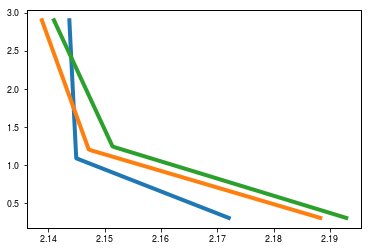

In [63]:
#plt.plot(qua1['r'],qua1['n'],marker='o')
plt.plot(piecewise_linear(densarr, *p1), densarr,lw=4)
plt.plot(piecewise_linear(densarr, *p2), densarr,lw=4)
plt.plot(piecewise_linear(densarr, *p3), densarr,lw=4)
#plt.plot(medfilt(qua1['r'],91), qua1['n'],lw=3)
#plt.plot(polf(densarr, *popt1), densarr, lw=4)
plt.plot()
plt.show()

In [49]:
popt1

array([ 0.00196811,  1.68882052, -0.02438186, -0.67775933])